A csv file of startup_funding is given which contain all the data of startups and all the information associated with it like
funding recieved, location it is located and many more. In this project I have used the data do some amount of data cleaning 
on it and then analysed the data which will be helpful for any enterpreneur who is going to start a new startup in many ways
like in which city the startup should be started so that chances of getting funding increases, which type of startups will have 
higher chances of getting funds easily.

In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

###  The trend of investments over the years.

As the startup_funding csv file contains funding done in year 2015,2016 and 2017. so let's find funding in those years.

2015 936
2016 993
2017 443


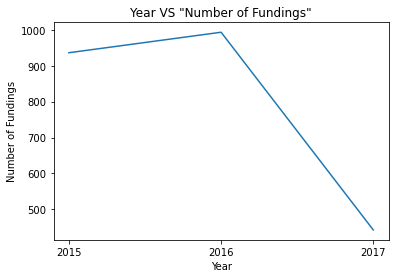

In [17]:
import collections
with open('startup_funding.csv') as file_obj:
    file_data = csv.DictReader(file_obj, skipinitialspace = True)
    #dic = dict.fromkeys([2015,2016,2017],0)
    dic = {}
    for i in file_data:
        year = i['Date'][-4:]
        dic[year] = dic.get(year,0) + 1 
    ord_dct = collections.OrderedDict(sorted(dic.items()))
plt.plot(list(ord_dct.keys()),list(ord_dct.values()))
plt.xlabel("Year")
plt.ylabel("Number of Fundings")
plt.title('Year VS "Number of Fundings"')
for i in ord_dct.keys():
        print(i,end=" ")
        print(ord_dct[i])


The trend of investment funding is irregular as we can see the total number of funding in year 2015 is 936 which then 
increased to 993 in year 2016 and then decreased to 443 in year 2017

### Top 10 cities of india which has most number of startups

for some starups which are in india and foreign country we will also count that indian city. Also in some place city location
is Delhi and at some places it is New Delhi also at some place city location is bangalore and at some place it is Bangalore 
I will convert Delhi into New Delhi and bangalore into Bangalore

Bangalore    635
Mumbai       449
New Delhi    389
Gurgaon      241
Pune          91
Noida         79
Hyderabad     77
Chennai       67
Ahmedabad     35
Jaipur        25
Name: CityLocation, dtype: int64


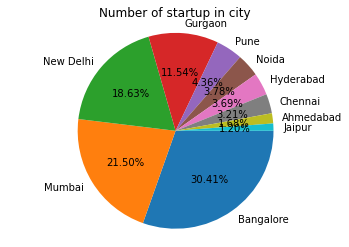

Bangalore 635
Mumbai 449
New Delhi 389
Gurgaon 241
Pune 91
Noida 79
Hyderabad 77
Chennai 67
Ahmedabad 35
Jaipur 25


In [27]:
df = pd.read_csv('startup_funding.csv',encoding = 'utf-8')
df.dropna(subset=["CityLocation"],inplace=True)

#Below function will remove the foreign countries name for those startups which are in india and in foreign countries also
def separateCity(city): 
    return city.split('/')[0].strip() 
df['CityLocation']=df['CityLocation'].apply(separateCity) 

df[df['CityLocation']=='bangalore'] = 'Bangalore'
df[df['CityLocation']=='Delhi'] = 'New Delhi'

city = df['CityLocation'] 
city = city.value_counts()[:10]
print(city)
city_name = city.index
no_of_str = city.values

plt.pie(no_of_str, labels=city_name, autopct='%.2f%%',counterclock=False)
plt.title('Number of startup in city')
plt.axis("equal")
plt.show()



From the data given we can clearly see that number of startups in Bangalore is highest and Bangalore , Mumbai , Delhi and
Gurgaon are top four cities having number of starups more than 200 else other cities have startup less than 100

###  Top 10 Indian cities with most amount of fundings received.

Here the amounts are in string format so first we will change it to float and also do the same thing as above(i.e. case
sensitiveness of cities)

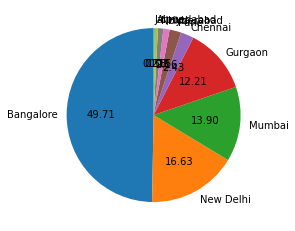

Bangalore 49.71 %
New Delhi 16.63 %
Mumbai 13.90 %
Gurgaon 12.21 %
Chennai 2.43 %
Pune 2.16 %
Hyderabad 1.15 %
Noida 1.01 %
Ahmedabad 0.58 %
Jaipur 0.21 %


In [6]:
df = pd.read_csv('startup_funding.csv',encoding = 'utf-8')
df.dropna(subset=["CityLocation"],inplace=True)
def separateCity(city):
    return city.split('/')[0].strip()
df['CityLocation'] = df['CityLocation'].apply(separateCity)
df['CityLocation'].replace("Delhi","New Delhi",inplace = True)
df['CityLocation'].replace("bangalore","Bangalore",inplace = True)

df['AmountInUSD'] = df['AmountInUSD'].apply(lambda x: float(str(x).replace(",","")))
df = df.groupby('CityLocation')['AmountInUSD'].sum()
df = df.sort_values(ascending = False)[0:10]
city = df.index
amount = df.values
plt.pie(amount,labels = city,autopct='%0.2f',startangle=90)
plt.show()

percent = np.true_divide(amount,amount.sum())*100
for i in range(len(city)):
    print(city[i],format(percent[i],'0.2f',),"%")

We can infer from above two results that bangalore has max number of startups and it received most amount of funding also 
although it is not the case for delhi and mumbai the number of startups in mumbai is 60 more than that in delhi but still
the amount of funding received in delhi is greater than that in mumbai

### Different type of investments

As some places in the column of Amount in USD are empty so we will fill it with zero also check the case sensitiveness of 
names of different investment type (as Crowd funding -> Crowd Funding, PrivateEquity -> Private Equity and
SeedFunding -> Seed Funding.

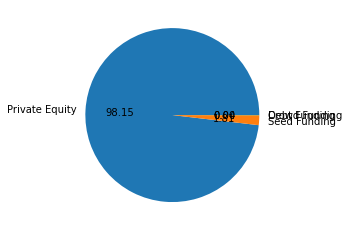

Private Equity 98.15
Seed Funding 1.81
Debt Funding 0.04
Crowd Funding 0.00


In [7]:
df = pd.read_csv('startup_funding.csv')
df = df.iloc[: ,7:9]
df['AmountInUSD'].fillna(0,inplace = True)
df['InvestmentType'].replace("Crowd funding","Crowd Funding",inplace = True)
df['InvestmentType'].replace("PrivateEquity","Private Equity",inplace = True)
df['InvestmentType'].replace("SeedFunding","Seed Funding",inplace = True)

df['AmountInUSD'] = df['AmountInUSD'].str.replace(',','').astype(float)
df = df.groupby('InvestmentType').AmountInUSD.sum()
df = df.sort_values(ascending = False)
invest_type = df.index
amount = df.values
per = np.true_divide(amount,amount.sum())*100
plt.pie(amount,labels = invest_type,autopct = '%.2f')
plt.show()

for i in range(len(invest_type)):
    print(invest_type[i],format(per[i],'0.2f'))

we can clearly see most of investment type are private equity and crowd funding is almost zero.

###  Top 5 type of industries which got funding easily.

handling case sensitiveness as ( eCommerce -> Ecommerce, ECommerce -> Ecommerce and ecommerce -> Ecommerce. filing empty 
AmountInUSD values with zero

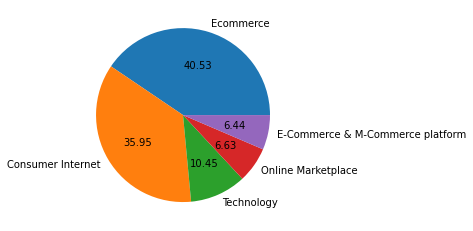

Ecommerce 40.53
Consumer Internet 35.95
Technology 10.45
Online Marketplace 6.63
E-Commerce & M-Commerce platform 6.44


In [9]:
df = pd.read_csv('startup_funding.csv')
df['IndustryVertical'].replace('eCommerce','Ecommerce',inplace = True)
df['IndustryVertical'].replace('ECommerce','Ecommerce',inplace = True)
df['IndustryVertical'].replace('ecommerce','Ecommerce',inplace = True)
df['AmountInUSD'].fillna(0,inplace = True)
df['AmountInUSD'] = df['AmountInUSD'].str.replace(',','').astype(float)
df = df.groupby('IndustryVertical').AmountInUSD.sum()
df = df.sort_values(ascending = False)[0:5]

industry = df.index
amount = df.values
per = np.true_divide(amount,amount.sum())*100
plt.pie(amount,labels = industry,autopct='%0.2f')
plt.show()
for i in range(5):
    print(industry[i],format(per[i],'0.2f'))



### Top 5 startups with most amount of total funding.

handling case sensitiveness as(Oyorooms -> Oyo, OyoRooms -> Oyo, Oyo Rooms -> Oyo , OYO Rooms -> Oyo and many more)

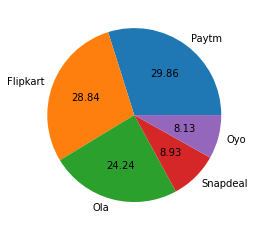

Paytm
Flipkart
Ola
Snapdeal
Oyo


In [14]:
df = pd.read_csv('startup_funding.csv',encoding = 'utf-8')
df['StartupName'].replace('Oyorooms','Oyo',inplace = True)
df['StartupName'].replace('OyoRooms','Oyo',inplace = True)
df['StartupName'].replace('Oyo Rooms','Oyo',inplace = True)
df['StartupName'].replace('OYO Rooms','Oyo',inplace = True)
df['StartupName'].replace('Olacabs','Ola',inplace = True)
df['StartupName'].replace('Ola Cabs','Ola',inplace = True)
df['StartupName'].replace('Olacabs','Ola',inplace = True)
df['StartupName'].replace('Flipkart.com','Flipkart',inplace = True)
df['StartupName'].replace('Paytm Marketplace','Paytm',inplace = True)

df['AmountInUSD'].fillna(0,inplace = True)
df['AmountInUSD'] = df['AmountInUSD'].str.replace(',','').astype(float)
df = df.groupby('StartupName').AmountInUSD.sum()
df = df.sort_values(ascending = False)[0:5]


startups = df.index
amount = df.values
per = np.true_divide(amount,amount.sum())*100
plt.pie(amount,labels = startups,autopct='%0.2f')
plt.show()

industry = df.index
for i in range(5):
    print(industry[i])